## Bati Bank Exploratory Data Analysis

#### Import Liberaries 

In [1]:
import os
import sys
import numpy as np
import pandas as pd
current_dir = os.getcwd()

# Append the parent directory to sys.path
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)

# ignore warrnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import ExploratoryDataAnalysis class from scripts.EDA_scripts module
from scripts.Bati_Bank_EDA import ExploratoryDataAnalysis

In [3]:
# Load the data save into dataFrame
df = pd.read_csv('../data/data.csv')
# Create an instance of the ExploratoryDataAnalysis class
eda = ExploratoryDataAnalysis(df)
# view top five records from the dataframe
eda.head()

2025-01-24 14:57:52,412 - INFO - ExploratoryDataAnalysis initialized with DataFrame of shape (95662, 16)
2025-01-24 14:57:52,413 - INFO - Fetching the first five rows of the DataFrame.


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


### Explanation of variables
- **TransactionId**: Unique transaction identifier on platform
- **BatchId**: Unique number assigned to a batch of transactions for processing
- **AccountId**: Unique number identifying the customer on platform
- **SubscriptionId**: Unique number identifying the customer subscription
- **CustomerId**: Unique identifier attached to Account
- **CurrencyCode**: Country currency
- **CountryCode**: Numerical geographical code of country
- **ProviderId**: Source provider of Item bought.
- **ProductId**: Item name being bought.
- **ProductCategory**: ProductIds are organized into these broader product categories.
- **ChannelId**: Identifies if customer used web,Android, IOS, pay later or checkout.
- **Amount**: Value of the transaction. Positive for debits from customer account and negative for credit into cus...
- **Value**: Absolute value of the amount
- **TransactionStartTime**: Transaction start time
- **PricingStrategy**: Category of Xente's pricing structure for merchants
- **FraudResult**: Fraud status of transaction 1 -yes or 0-No

In [4]:
# List of numerical and categorical columns
numerical_cols = ['Amount', 'Value']
categorical_cols = ['ChannelId', 'ProductCategory', 'CountryCode','ProductId','PricingStrategy', 'FraudResult']

### 1: Dataset Overview

In [5]:
# Dataset overview
eda.dataset_overview() 

2025-01-24 14:57:52,465 - INFO - Displaying dataset overview.


Dataset Overview:
Number of rows: 95662
Number of columns: 16

Column Data Types:
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

First 5 rows of the dataset:
         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   Accou

### 2. Summary Statistics
Understand the central tendency (mean, median), dispersion (variance, standard deviation), and shape of numerical columns.

In [6]:
eda.summary_statistics()

2025-01-24 14:57:52,504 - INFO - Calculating summary statistics.



Summary Statistics:
       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000


##### Based on the summary statistics:

- **CountryCode**: All entries are from a single country (code 256).
- **Amount and Value**: Both have a wide range with negative minimums, indicating possible data entry errors or refunds, and extremely high maximums.
- **PricingStrategy**: Most entries use strategy 2, with a small range of strategies.
- **FraudResult**: The mean is very low, confirming that fraud is rare in this dataset.

### 3. Distribution of Numerical Features
Visualize the distribution of numerical features to identify patterns, skewness, and potential outliers.

2025-01-24 14:57:52,578 - INFO - Plotting numerical distributions for columns: ['Amount', 'Value']


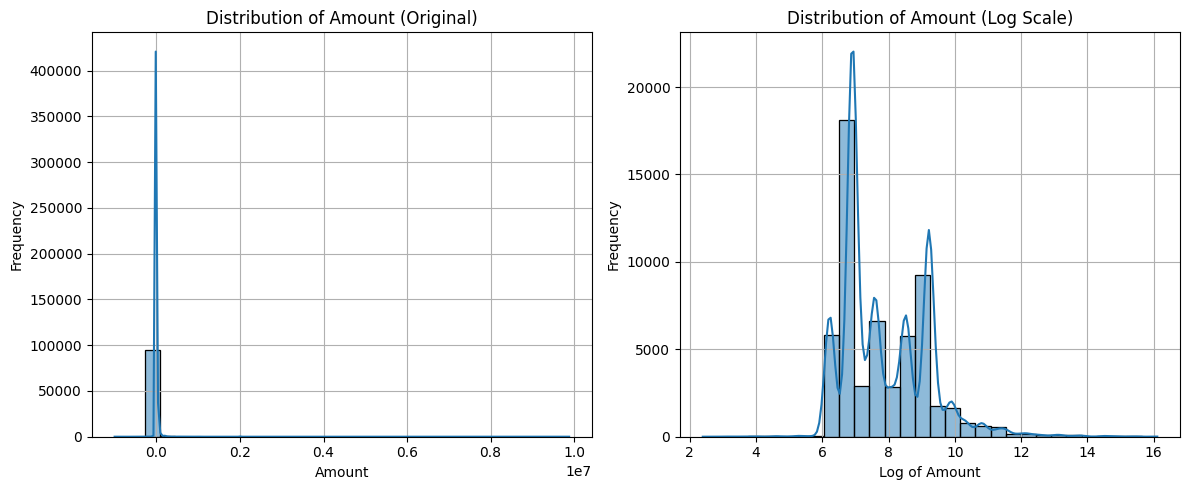

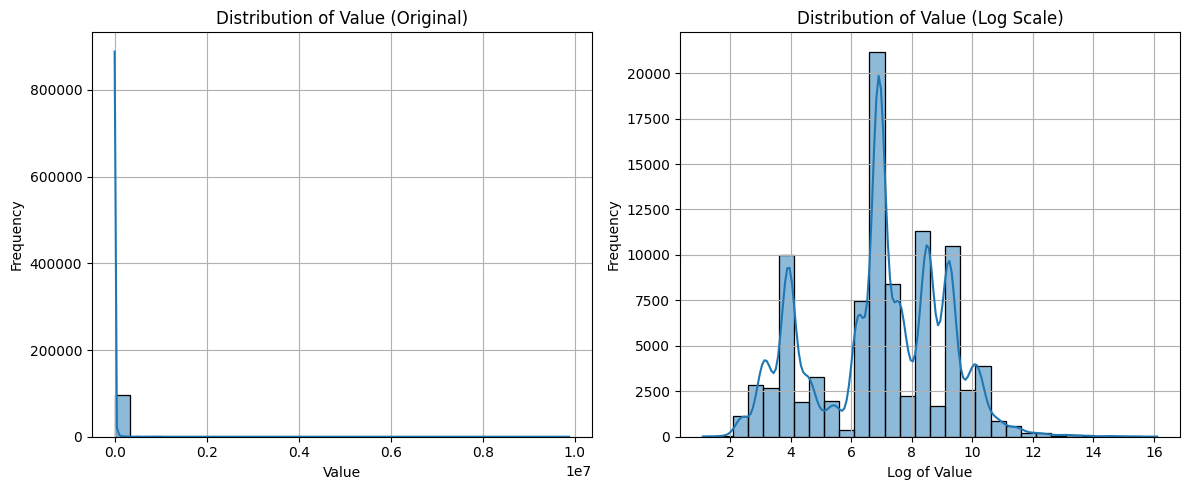

In [7]:
# Histogram for numerical columns like Amount, Value
eda.plot_numerical_distribution(numerical_cols)  #  Numerical Features Distribution